<a href="https://colab.research.google.com/github/harshit4311/growth-value-predator-prey/blob/main/growth_value_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hi')

hi


In [ ]:
import yfinance as yf

tickers = {
    "Russell1000": "IWB",
    "Russell1000_Growth": "IWF",
    "Russell1000_Value": "IWD"
}

data = {}
for name, ticker in tickers.items():
    df = yf.download(ticker, start="2020-01-01", end="2025-01-01")
    data[name] = df
    df.to_csv(f"{name}_OHLCV.csv")


/tmp/ipython-input-2-2934697198.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-2934697198.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-2934697198.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

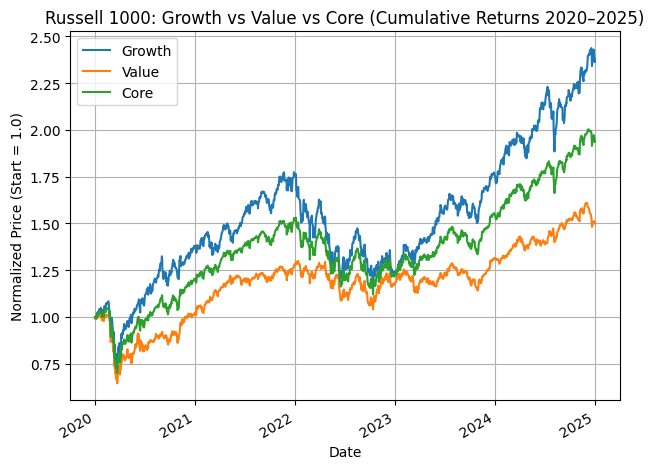

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def load_clean_csv(path):
    raw_df = pd.read_csv(path, skiprows=1)
    raw_df.columns = raw_df.iloc[0]
    raw_df = raw_df.drop(index=0)

    # correct column names
    raw_df.columns = raw_df.columns.str.strip()
    raw_df.rename(columns={raw_df.columns[0]: "Date",
                           raw_df.columns[1]: "Open",
                           raw_df.columns[2]: "High",
                           raw_df.columns[3]: "Low",
                           raw_df.columns[4]: "Close",
                           raw_df.columns[5]: "Volume"
                          }, inplace=True)


    # parse date col
    raw_df["Date"] = pd.to_datetime(raw_df["Date"])
    raw_df.set_index("Date", inplace=True)

    # OHLCV columns --> float, coercing errors
    ohlcv_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlcv_cols:
        raw_df[col] = pd.to_numeric(raw_df[col], errors='coerce')

    return raw_df

# load datasets
growth_df = load_clean_csv('/content/Russell1000_Growth_OHLCV.csv')
value_df  = load_clean_csv('/content/Russell1000_Value_OHLCV.csv')
core_df   = load_clean_csv('/content/Russell1000_OHLCV.csv')


# 'Price' column as Adjusted Close proxy
adj_close_df = pd.DataFrame({
    'Growth': growth_df['Close'].astype(float),
    'Value': value_df['Close'].astype(float),
    'Core': core_df['Close'].astype(float)
})

# calc. cumulative returns
cumulative_returns = adj_close_df / adj_close_df.iloc[0]

# plot
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title("Russell 1000: Growth vs Value vs Core (Cumulative Returns 2020–2025)")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Start = 1.0)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

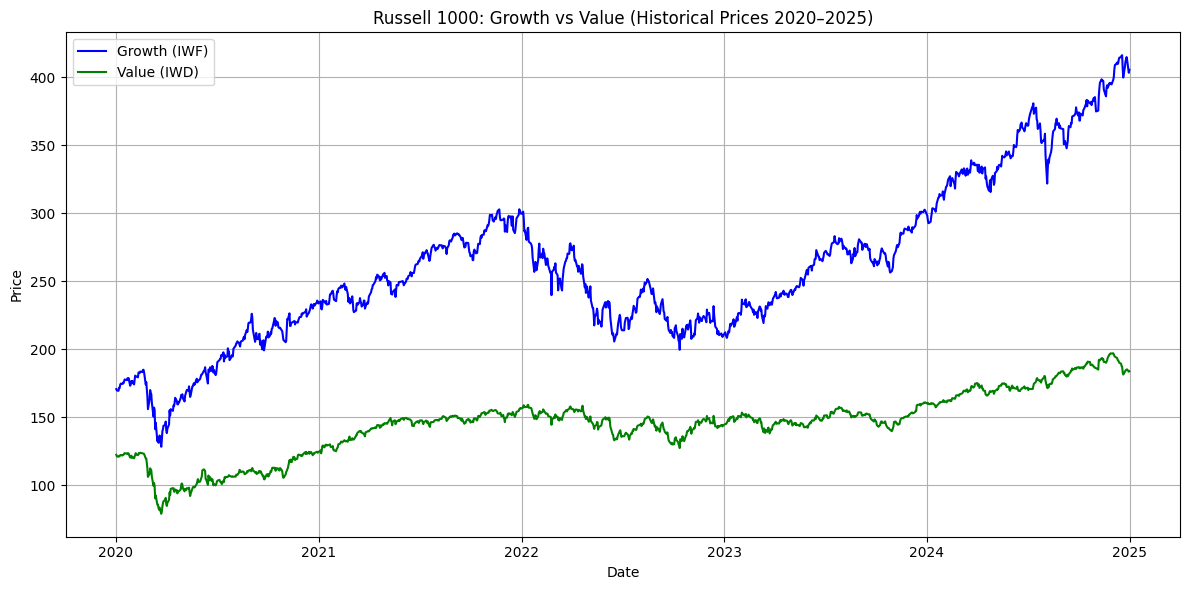

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(growth_df.index, growth_df['Close'], label='Growth (IWF)', color='blue')
plt.plot(value_df.index, value_df['Close'], label='Value (IWD)', color='green')

plt.title("Russell 1000: Growth vs Value (Historical Prices 2020–2025)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


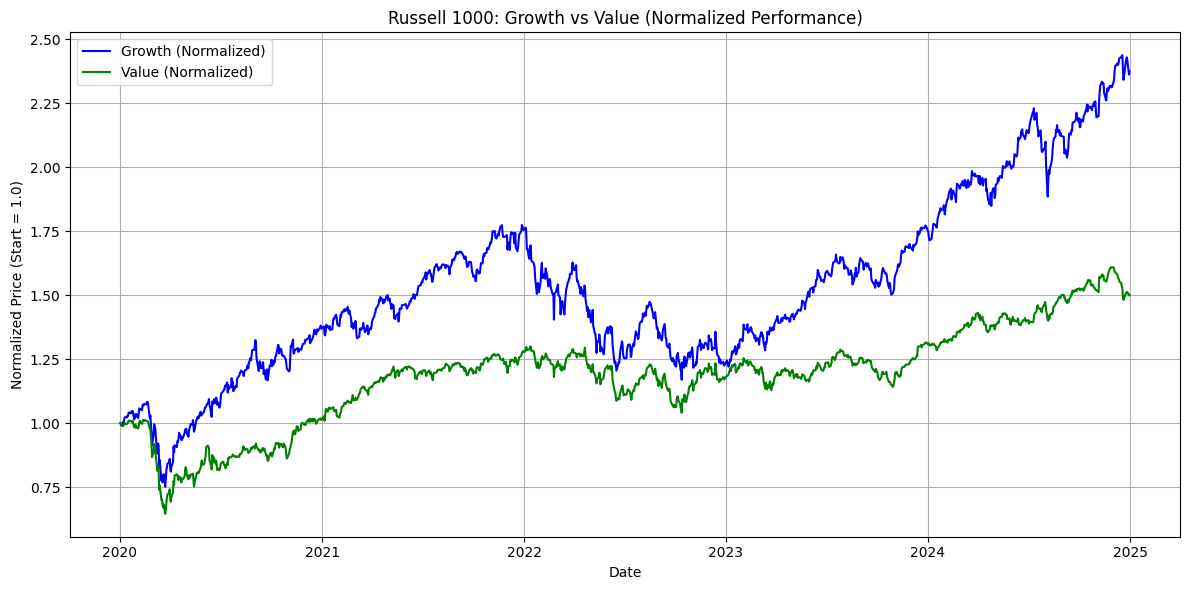

In [18]:
# normalize to 1.0 val
norm_growth = growth_df['Close'] / growth_df['Close'].iloc[0]
norm_value  = value_df['Close']  / value_df['Close'].iloc[0]

plt.figure(figsize=(12, 6))
plt.plot(norm_growth.index, norm_growth, label='Growth (Normalized)', color='blue')
plt.plot(norm_value.index, norm_value, label='Value (Normalized)', color='green')

plt.title("Russell 1000: Growth vs Value (Normalized Performance)")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Start = 1.0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Growth – Value Spread (Normalized)'}, xlabel='Date'>

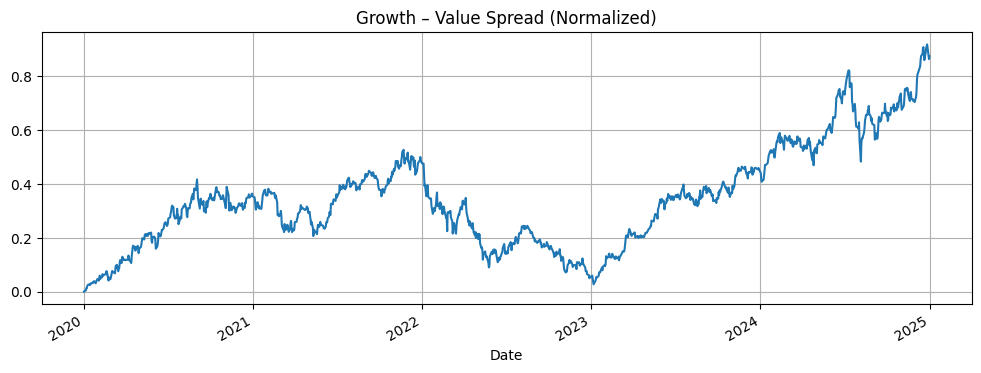

In [19]:
spread = norm_growth - norm_value
spread.plot(title="Growth – Value Spread (Normalized)", figsize=(12,4), grid=True)